# PRE-PROCESSING DATA

The Pre-processing part consists of preparing the data for further analysis and it's done on the corpus extracted from the 'original_text' column 

Running the useful notebooks

In [1]:
%run setup.ipynb
%run Functions_for_text_analysis.ipynb
%run importing,df_study,corpus.ipynb

C:\Users\39324\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\39324\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\39324\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<>:25: DeprecationWarning: invalid escape sequence \S
C:\Users\39324\AppData\Local\Temp\ipykernel_21156\2979463074.py:25: DeprecationWarning: invalid escape sequence \S
  p1 = re.sub(pattern='http://\S+|https://\S+',repl= '', string=word)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\39324\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[n

Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-03-10.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-03-17.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-03-24.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-03-31.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-04-07.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-04-14.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-04-21.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-04-28.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-05-05.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-05-12.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-05-19.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-05-26.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-06-02.csv
Loading C:\Users\39324\OneDrive\Documenti\PR206DATA\Ebola2022-06

Preprocess function is defined in the Functions_for_text_analysis notebook, it consists of several steps which can be done on text data: in this case a keep list has been specified for the words to keep, the text is then cleaned, the stopwords are removed and eventually lemmatization is done.

In [2]:
common_words = ['U.S.A','USA','Mr.', 'Mrs.', 'D.C.','U.N.','UN','covid-19','Covid-19','C.L.I.A']
corpus_preprocessed = preprocess(corpus, 
                                       keep_list = common_words,
                                       cleaning= True,
                                       stemming = False, stem_type = None, 
                                       lemmatization = True, 
                                       remove_stopwords = True)

In [3]:
corpus_preprocessed

['september 16 2019 gas explosion koltsovo novosibirsk oblast russia set fire bioweapons plant house viruses include smallpox ebola anthrax',
 'highcontainment labs identify USA today experiment underway involve drugresistant tuberculosis exotic strain flu sars mers viruses plague anthrax botulism ricin ebola marburg hemorrhagic fever viruses',
 'dont surprise find ebola import africa us biolab ukraine',
 'highcontainment labs us identify USA today experiment underway involve drugresistant tuberculosis exotic strain flu sars mers viruses plague anthrax botulism ricin ebola marburg hemorrhagic fever viruses accord',
 'coronavirus go disappear like swine flu ebola ya daddy tax',
 'pretty cool unite state run lab ukraine study ebola marburg virus surely protocols safety properly follow nothing strange conduct potus',
 'give vanitas drop kick ebola',
 'long ebola release already',
 '2008 know georgia invasion precede market tank 2014 remember ebola bring mkt 10 deal repercussions stimulus 

A new column is created in the dataframe containing the documents (tweets) pre-processed

In [4]:
df['corpus_preproc']=corpus_preprocessed

# DATA EXPLORATION

A figure with the histogram of the documents by the number of characters is plotted: most of the documents in the pre-processed corpus have between 20 and 80 characters.

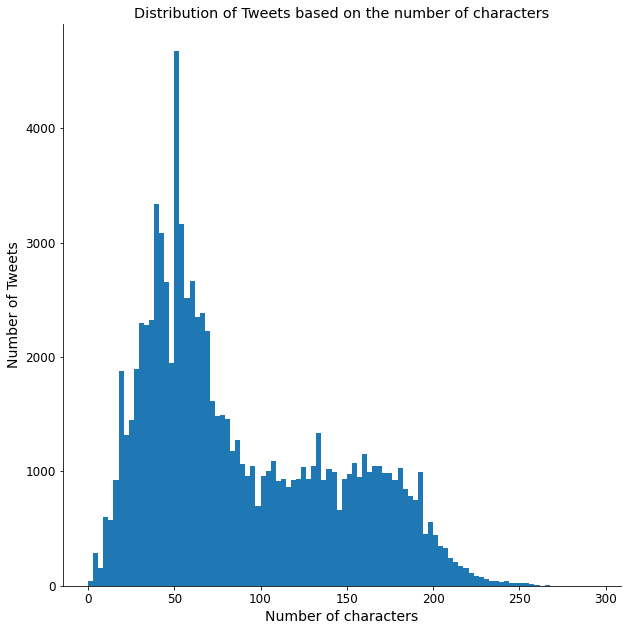

In [9]:
plt.figure(figsize=(10,10))
doc_lens = [len(d) for d in corpus_preprocessed]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets based on the number of characters')
plt.ylabel('Number of Tweets')
plt.xlabel('Number of characters')
sns.despine()

Wordcloud: graphical representation of text data in which the most frequently occurring words in a text are displayed. The largest words representing the most common words.

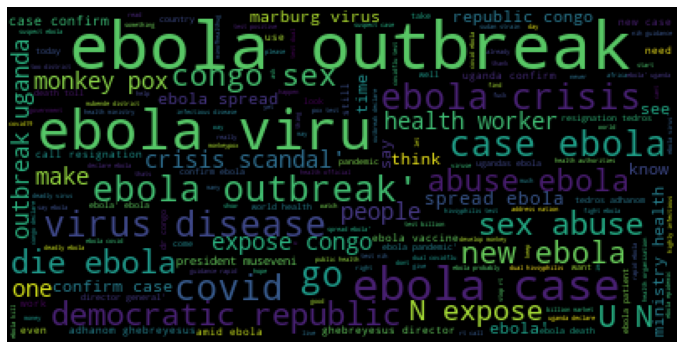

In [7]:
mpl.rcParams['figure.figsize']=(12.0,14.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(corpus_preprocessed))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Top 30 most common unigrams with their absolute frequencies

In [8]:
common_words = get_top_n_words(corpus_preprocessed, 30)
dftopw = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

In [10]:
dftopw

,unigram,count
0,ebola,84516
1,uganda,18674
2,outbreak,18455
3,virus,12540
4,case,11669
5,health,10394
6,disease,6476
7,spread,6354
8,new,6238
9,confirm,6002


Top 30 most common bigrams with their absolute frequencies

In [11]:
common_bigrams = get_top_n_bigram(corpus_preprocessed, 30)
dftopbi = pd.DataFrame(common_bigrams, columns = ['bigram' , 'count'])

In [12]:
dftopbi

,bigram,count
0,ebola outbreak,10096
1,ebola virus,5966
2,ebola case,3542
3,virus disease,2053
4,outbreak uganda,1908
5,case ebola,1868
6,ebola crisis,1820
7,die ebola,1766
8,spread ebola,1755
9,uganda ebola,1662


Top 30 most common trigrams with their absolute frequencies

In [13]:
common_trigrams = get_top_n_trigram(corpus_preprocessed, 30)
dftoptri = pd.DataFrame(common_trigrams, columns = ['trigram' , 'count'])

In [24]:
dftoptri

,trigram,count
0,ebola virus disease,1705
1,sex abuse ebola,1596
2,abuse ebola crisis,1596
3,congo sex abuse,1595
4,ebola crisis scandal,1590
5,expose congo sex,1589
6,democratic republic congo,1535
7,ebola outbreak uganda,1459
8,ghebreyesus director general,979
9,adhanom ghebreyesus director,978


Adding unigrams and bigrams column to the dataset 

In [25]:
df['unigrams'] = df.corpus_preproc.apply(list_unigrams)

In [26]:
df['bigrams'] = df.corpus_preproc.apply(list_bigrams)